### **Homework**
- Create linear regression model for group 2 using age as a feature/predictor variable.
- Also show comparisons of model performance metrics when including / removing outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics

&NewLine;  
#### <font color="blue">**Read Dataset**</font>

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/healthcare_cost.csv")
df.head()

,sex,age,bmi,nicotine_addict,district,healthcare_cost
0,female,21,27.900,yes,DT1,16884.92400
1,male,20,33.770,no,DT2,1725.55230
2,male,30,33.000,no,DT2,4449.46200
3,male,35,22.705,no,DT3,21984.47061
4,male,34,28.880,no,DT3,3866.85520


&NewLine;  
#### <font color="blue">**Adjust Data Type**</font>

In [3]:
df = df.astype({
    'sex': 'category',
    'nicotine_addict': 'category',
    'district': 'category'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              1338 non-null   category
 1   age              1338 non-null   int64   
 2   bmi              1338 non-null   float64 
 3   nicotine_addict  1338 non-null   category
 4   district         1338 non-null   category
 5   healthcare_cost  1338 non-null   float64 
dtypes: category(3), float64(2), int64(1)
memory usage: 35.8 KB


#### <font color="blue">**Data Groups**</font>

1.  nicotine_addict = yes, bmi \>= 30
2.  **nicotine_addict = yes, bmi \< 30**
3.  nicotine_addict = no

\
**Group 2**

In [4]:
df_g2 = df.query('nicotine_addict == "yes" & bmi < 30')
print(df_g2.shape)
df_g2.head(10)

(129, 6)


,sex,age,bmi,nicotine_addict,district,healthcare_cost
0,female,21,27.900,yes,DT1,16884.92400
11,female,64,26.290,yes,DT2,27808.72510
52,male,50,28.000,yes,DT1,23568.27200
58,female,55,22.880,yes,DT2,23244.79020
64,female,22,22.420,yes,DT3,14711.74380
69,male,30,23.980,yes,DT2,17663.14420
70,female,29,24.750,yes,DT2,16577.77950
85,male,47,22.895,yes,DT3,21098.55405
92,male,61,29.830,yes,DT4,30184.93670
98,male,58,19.950,yes,DT4,22412.64850


#### <font color="blue">**Build Linear Regression Model**</font>

In [5]:
#Your code
X = df_g2.filter(['age'])

y = df_g2.filter(["healthcare_cost"])
model = lr(fit_intercept=True)
model.fit(X, y)
y_pred = model.predict(X)
y_pred_reshape = y_pred.reshape(1, -1)[0]

print("Predictions:\n", pd.Series(y_pred_reshape))
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

Predictions:
 0      16455.511783
1      27663.021428
2      24014.064800
3      25317.263596
4      16716.151542
           ...     
124    19061.909375
125    19843.828652
126    19322.549134
127    27663.021428
128    27402.381669
Length: 129, dtype: float64
Slope: [[260.63975921]]
Intercept: [10982.07683925]


#### <font color="blue">**Plot Linear Model**</font>

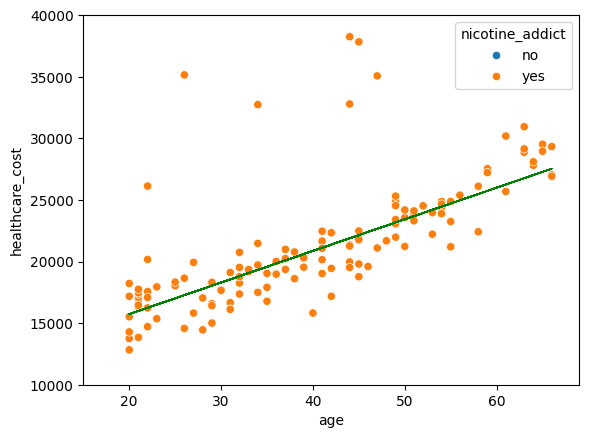

In [36]:
#Your code
pl=sns.scatterplot(data=df_g2,
                y="healthcare_cost",
                x="age",
                hue="nicotine_addict")
pl

# Plot pattern 1
plt.plot(X.values, y_pred, color='g', linewidth=1)

# Plot pattern 2
plt.plot(np.append(X.values,0), np.append(y_pred, model.intercept_), color='g', linewidth=1)

# Decorate plot
plt.xlim(15, X.age.max()+3)
plt.ylim(10000, 40000)
plt.show()


#### <font color="blue">**Plot Observed vs. Predicted 'healthcare_cost'**</font>

In [7]:
#Your code
df_pred = pd.DataFrame({'obs': df_g2.healthcare_cost.values, 'predict': y_pred_reshape})
df_pred.head()

,obs,predict
0,16884.9240,16455.511783
1,27808.7251,27663.021428
2,23568.2720,24014.064800
3,23244.7902,25317.263596
4,14711.7438,16716.151542


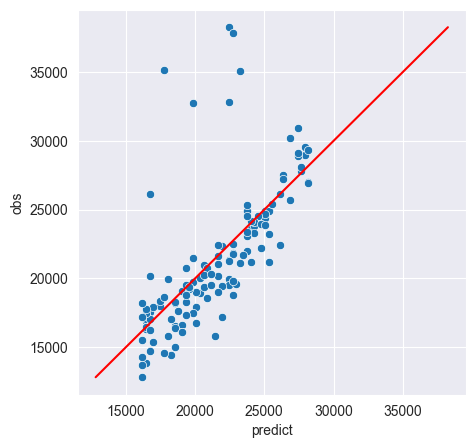

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_pred,
               x='predict',
               y='obs',
               ax=ax)
diag = np.linspace(start=min(df_pred.obs), stop=max(df_pred.obs))
plt.plot(diag,
         diag,
         color = 'r')

&NewLine;  
#### <font color="blue">**Calculate Model Performance**</font>

In [9]:
#Your code
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2:', metrics.r2_score(y, y_pred))

MAE: 2090.170037523489
MSE: 13199880.570822412
RMSE: 3633.1639889801854
R2: 0.48181414037841475


&NewLine;  
#### <font color="blue">**Removing Outliers**</font>

<Axes: ylabel='healthcare_cost'>

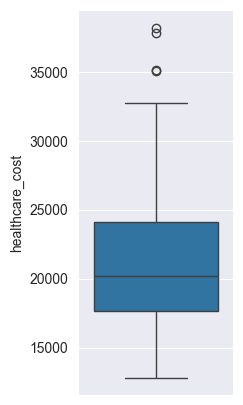

In [10]:
#Your code
fig, ax = plt.subplots(figsize=(2, 5))
sns.boxplot(data=df_g2,
            y="healthcare_cost",
            whis=1.5,
            ax=ax)

In [11]:
#Your code
q1, q3 = np.percentile(df_g2.healthcare_cost, [25, 75])
print("q1:", q1)
print("q3:", q3)

IQR = q3 - q1
print("IQR: ", IQR)

upper = df_g2.healthcare_cost[df_g2.healthcare_cost <= (q3 + 1.5*IQR)].max()
lower = df_g2.healthcare_cost[df_g2.healthcare_cost >= (q1 - 1.5*IQR)].min()
print("Upper: ", upper)
print("Lower: ", lower)

q1: 17663.1442
q3: 24106.91255
IQR:  6443.768350000002
Upper:  32787.45859
Lower:  12829.4551


In [12]:
df_g2_remOut = df_g2[(df_g2.healthcare_cost < upper) & (df_g2.healthcare_cost > lower)]
df_g2_remOut.shape

(123, 6)

<Axes: ylabel='healthcare_cost'>

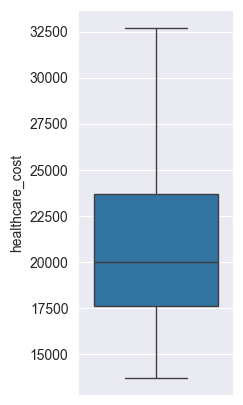

In [13]:
fig, ax = plt.subplots(figsize=(2, 5))  #set size of plot (width, height)
sns.boxplot(data=df_g2_remOut,
            y="healthcare_cost",
            whis=1.5,
            ax=ax)

#### <font color="blue">**Create Model After Removing Outliers**</font>

In [14]:
#Your code
X = df_g2_remOut.filter(["age"], axis=1)
y = df_g2_remOut.filter(["healthcare_cost"], axis=1)
model = lr(fit_intercept=True)
model.fit(X, y)
y_pred = model.predict(X)

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

Slope: [[256.60502405]]
Intercept: [10597.57709586]


#### <font color="blue">**Evaluate Model Performance After Removing Outliers**</font>

In [15]:
#Your code
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2:', metrics.r2_score(y, y_pred))

MAE: 1504.3955544689245
MSE: 5097963.748866076
RMSE: 2257.8670795390226
R2: 0.7036158335367159


(15.0, 70.0)

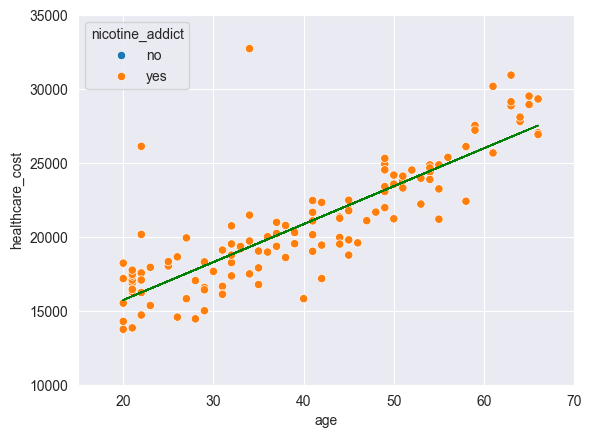

In [16]:
sns.scatterplot(data=df_g2_remOut,
                y="healthcare_cost",
                x="age",
                hue="nicotine_addict")
pl
plt.plot(X.values, y_pred, color='g', linewidth=1)
plt.ylim(10000, 35000)
plt.xlim(15, 70)

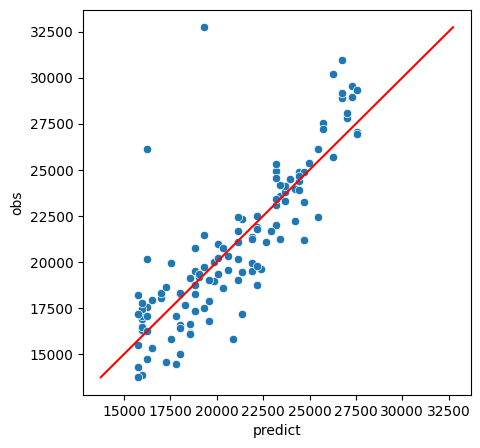

In [41]:
y_pred_reshape_2 = y_pred.reshape(1, -1)[0]
df_pred = pd.DataFrame({'obs': df_g2_remOut.healthcare_cost.values, 'predict': y_pred_reshape_2})
df_pred.head()

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_pred,
               x='predict',
               y='obs',
               ax=ax)
diag = np.linspace(min(df_pred.obs), max(df_pred.obs))
plt.plot(diag,
         diag,
         color = 'r')

sns.reset_defaults()
plt.show()